## Практическое задание

<ol>
    <li>Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?</li>
</ol>

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [43]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

In [45]:
# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

In [46]:
# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

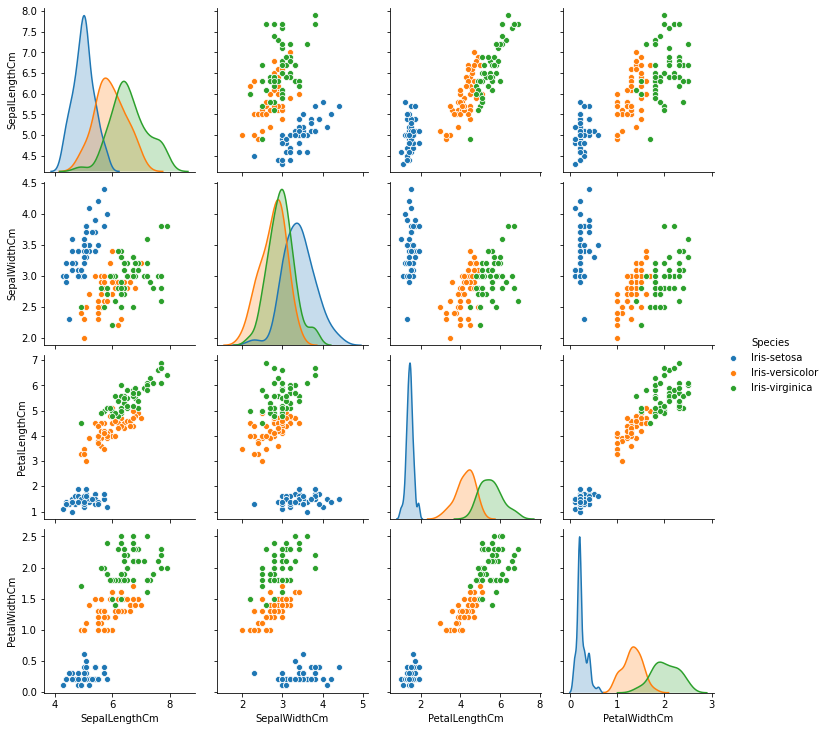

In [47]:
### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")
# print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
# plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = iris_data[columns]
x = normalize(x.to_numpy())

# формирование выходных данных(результатов)
columns = ['Species']
y = iris_data[columns]
y = y.to_numpy()
y = y.flatten()
y = to_one_hot(y)

In [48]:
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [76]:
### Шаг 3. Обученние нейронной сети
# присваевание случайных весов
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 5 выходов
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.1
iterations = 1000000

In [72]:
def train_nn(w0, w1, n, X_train, y_train, iterations):
    w0_ = w0.copy()
    w1_ = w1.copy()
    # массив для ошибок, чтобы потом построить график
    errors = []

    # процесс обучения
    for i in range(iterations):

        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0_))
        layer2 = sigmoid(np.dot(layer1, w1_))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train - layer2
        layer2_delta = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_delta.dot(w1_.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)

        w1_ += layer1.T.dot(layer2_delta) * n
        w0_ += layer0.T.dot(layer1_delta) * n

        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100
        
    print("Точность нейронной сети " + str(round(accuracy,2)) + "%")
    return errors

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Точность нейронной сети 95.83%


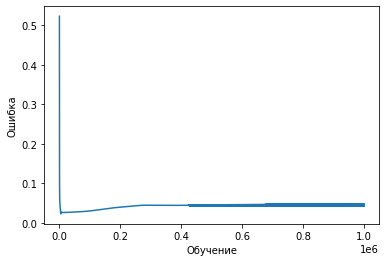

Wall time: 1min 38s


In [80]:
%%time
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
errs = train_nn(w0, w1, n, X_train, y_train, 1000000)

plt.plot(errs)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть

### Протестируем, как влияет на точность сети кол-во итераций

Точность нейронной сети 78.1%


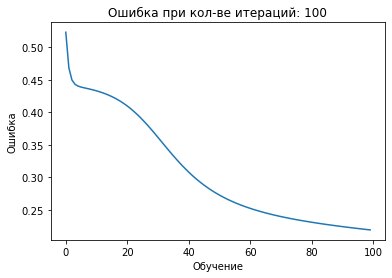

Точность нейронной сети 94.18%


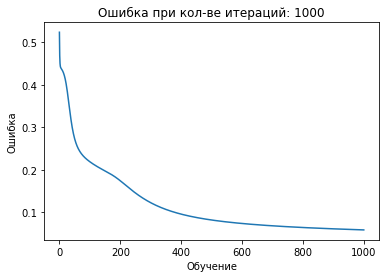

Точность нейронной сети 97.4%


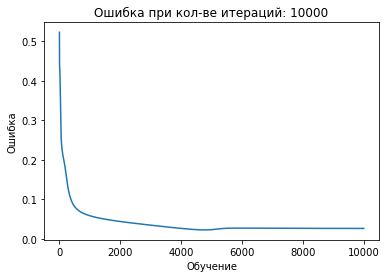

Точность нейронной сети 97.02%


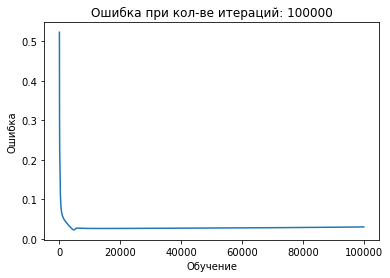

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Точность нейронной сети 95.74%


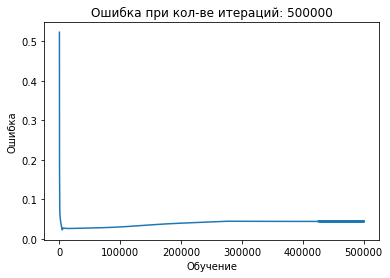

Wall time: 55.7 s


In [84]:
%%time
iters = [100, 1000, 10000, 100000, 500000]
for i in iters:
    errs = train_nn(w0, w1, n, X_train, y_train, i)
    
    plt.plot(errs)
    plt.title(f'Ошибка при кол-ве итераций: {i}')
    plt.xlabel('Обучение')
    plt.ylabel('Ошибка')
    plt.show()

__Вывод: при росте кол-ва итераций до какой-то степени мы получаем увеличение точности предсказания, но затем точность падает. Скорей всего это связано с перескакиванием минимума ошибки в градиентном бустинге__

### Протестируем влияние шага обучения:

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Точность нейронной сети 95.83%


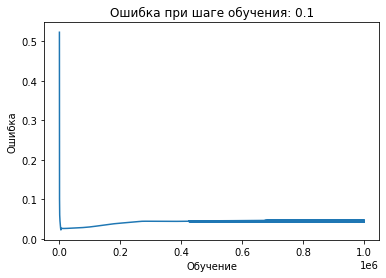

Точность нейронной сети 96.99%


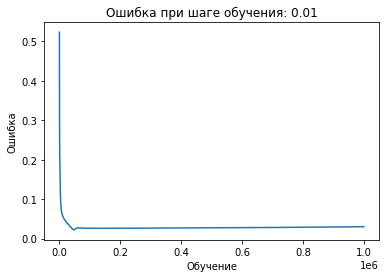

Точность нейронной сети 97.39%


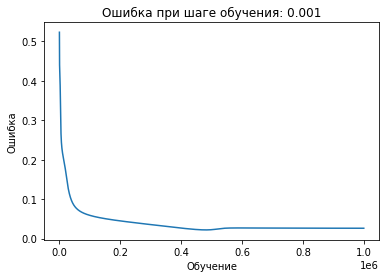

Точность нейронной сети 94.12%


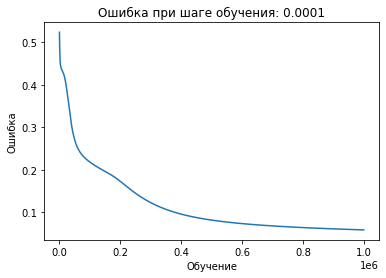

Wall time: 5min 41s


In [89]:
%%time
n_steps = [0.1, 0.01, 0.001, 0.0001]
for n in n_steps:
    errs = train_nn(w0, w1, n, X_train, y_train, 1000000)
    
    plt.plot(errs)
    plt.title(f'Ошибка при шаге обучения: {n}')
    plt.xlabel('Обучение')
    plt.ylabel('Ошибка')
    plt.show()

__Вывод: шаг нужно также стремится уменьшать, чтобы увеличить точность, но при уменьшении шага требуется большее кол-во итераций. Выше я протестировал разные шаги при 10 000 итераций и при 1 млн итераций. Видно, что точность на 1 млн повысилась с уменьшением шага, но до определенного предела. Чтобы точность повысить еще больше для меньшего шага (0.0001) нужно еще больше итераций. Причина та же - перескакивание минимума ошибки в градиентном бустинге__

Аналогичным образом можно протестировать начальные веса - например, сделать сначала небольшое кол-во итераций, определить веса примерно. Затем уже полноценную модель тренировать на приближенных весах с меньшим шагом.

Также можно протестировать разные функции активации нейронов, но как это сделать пока не понимаю, т.к. используется производная сигмоиды. Чем ее заменить, если использовать ReLu, не понятно.